In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
os.chdir('/content/drive/My Drive/Bootcamp ML2020/')
os.listdir('.')
dataset = pd.read_csv('housing.csv')
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94ee87aef0>,
      dtype=object)

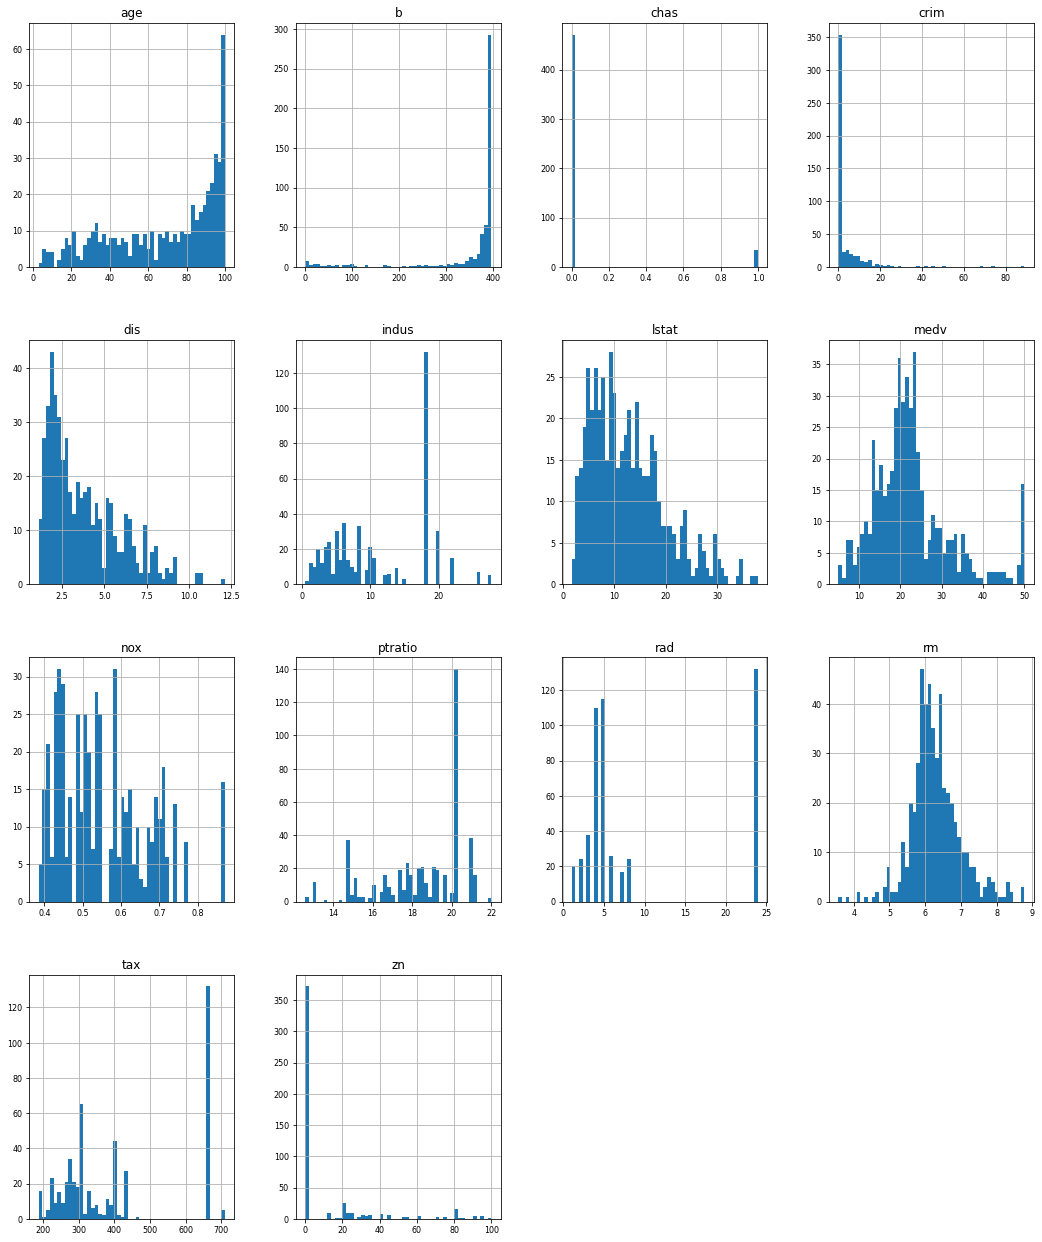

In [ ]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
dataset.corr()['medv'][:-1]

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
Name: medv, dtype: float64

In [ ]:
corr = dataset.corr()

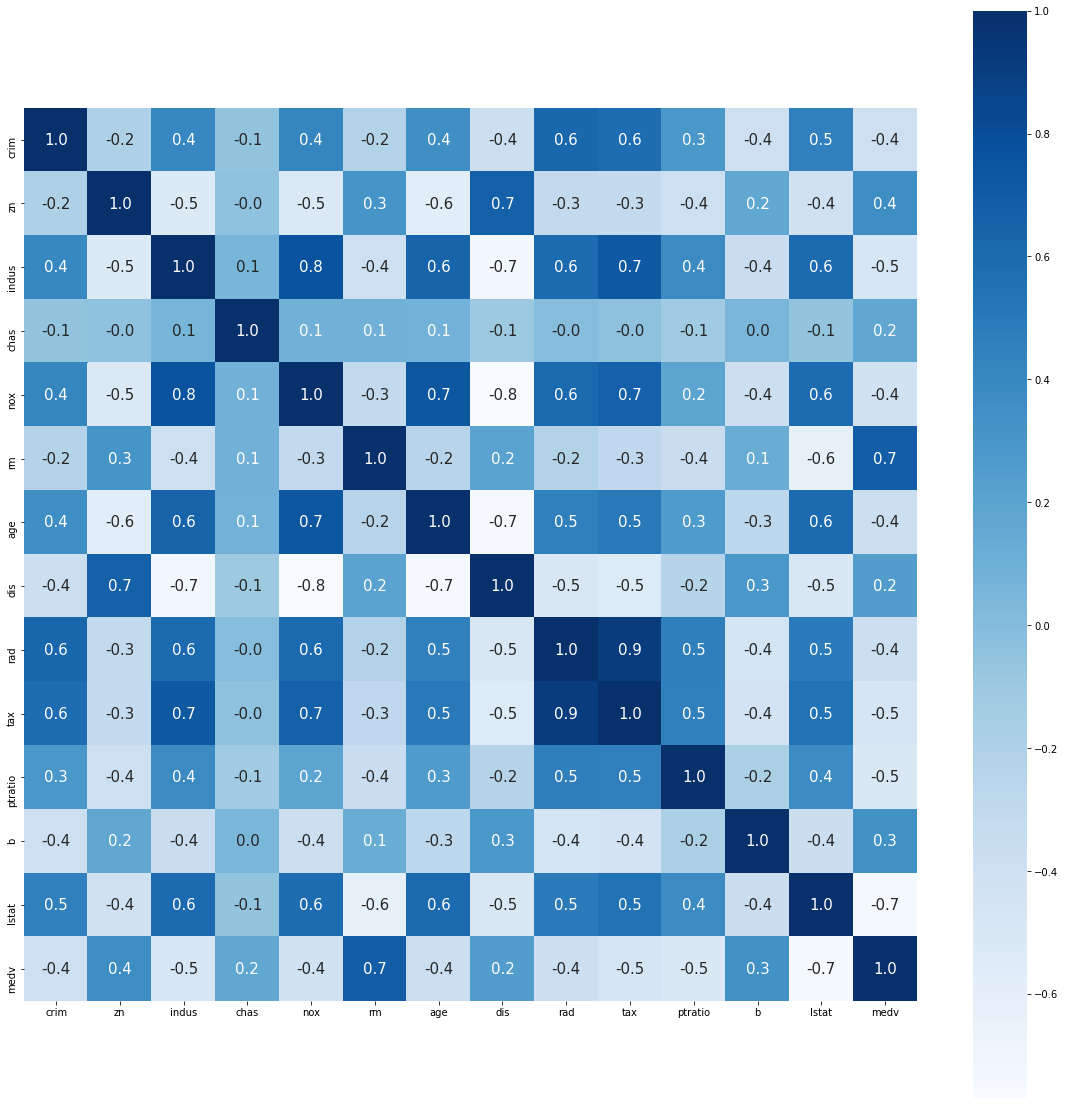

In [ ]:
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

In [ ]:
Y = dataset['medv'] #label
x = dataset.drop(['medv'], axis=1) #features

**Soal Nomor 1**

In [ ]:
def acc_scaler(arr_name, arr_scl):
  # scaler = arr_scl
  X = arr_scl.fit_transform(x) #x=features
  data_x = pd.DataFrame(X, columns=x.columns) #pengganti features di materi

  x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.25, random_state=10)

  lm = LinearRegression()
  lm.fit(x_train, y_train)
  y_pred = lm.predict(x_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print(arr_name)
  print()
  print('Accuracy of ',arr_name,' on train set : {:.2f}'.format(lm.score(x_train, y_train))) # .score() -> Accuracy
  print('Accuracy of ',arr_name,' on test set  : {:.2f}'.format(lm.score(x_test, y_test))) # .score() -> Accuracy
  print()
  print("MSE (Mean Squared Error)                   :", mse)
  print("MAE (Mean Absolute Error)                  :", mae)
  print("r^2 score                                  :", r2)
  print('RMSE (Root Mean Squared Error)             :', np.sqrt(mean_squared_error(y_test, y_pred)))
  print('====================================================================')

arr_scl=[StandardScaler(),PowerTransformer(method='yeo-johnson', standardize=True),QuantileTransformer(),MinMaxScaler(),MaxAbsScaler(),RobustScaler()]
arr_name=['Standar Scaler','Power Transformer Yeo Johnson','Quantile Transformer','Min Max Scaler','Max Abs Scaler','Robust Scaler']

for a in range(len(arr_scl)):
  acc_scaler(arr_name[a], arr_scl[a])

Standar Scaler

Accuracy of  Standar Scaler  on train set : 0.76
Accuracy of  Standar Scaler  on test set  : 0.67

MSE (Mean Squared Error)                   : 32.44253669600673
MAE (Mean Absolute Error)                  : 3.8573009079955103
r^2 score                                  : 0.6745585065949404
RMSE (Root Mean Squared Error)             : 5.6958350306172605
Power Transformer Yeo Johnson

Accuracy of  Power Transformer Yeo Johnson  on train set : 0.78
Accuracy of  Power Transformer Yeo Johnson  on test set  : 0.75

MSE (Mean Squared Error)                   : 25.374433577494614
MAE (Mean Absolute Error)                  : 3.626716061802263
r^2 score                                  : 0.7454609164768617
RMSE (Root Mean Squared Error)             : 5.037304197434835
Quantile Transformer

Accuracy of  Quantile Transformer  on train set : 0.73
Accuracy of  Quantile Transformer  on test set  : 0.70

MSE (Mean Squared Error)                   : 29.536466059204457
MAE (Mean Absolute 

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


Dari Berbagai Model Scaler yang digunakan terdapat 3 model yg memiliki hasil yang sama, baik itu nilai r2, MAE, MSE, maupun RMSE nya yaitu model Min Max Scaler, Max Abs Scaler dan Robust Scaler. untuk nilai r2 yang paling baik, didapat oleh model power transformer yeo-johnson dengan nilai 0.7454609164768617

***Untuk Power Transformer Metode Box-Cox akan menghasilkan error seperti dibawah***

In [ ]:
scaler = PowerTransformer(method='box-cox', standardize=True)
X = scaler.fit_transform(x) #x=features
data_x = pd.DataFrame(X, columns=x.columns) #pengganti features di materi

x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.25, random_state=10)

lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Box-Cox Transformation")
print()
print('Accuracy of box-cox on train set : {:.2f}'.format(lm.score(x_train, y_train))) # .score() -> Accuracy
print('Accuracy of box-cox on test set  : {:.2f}'.format(lm.score(x_test, y_test))) # .score() -> Accuracy
print()
print("MSE (Mean Squared Error)                   :", mse)
print("MAE (Mean Absolute Error)                  :", mae)
print("r^2 score                                  :", r2)
print('RMSE (Root Mean Squared Error)             :', np.sqrt(mean_squared_error(y_test, y_pred)))

ValueError: ignored

*Error ini disebakan karena **Box-Cox Transformation** hanya dapat digunakan untuk data yang benar benar positif, sedangkan angka 0 tidak dapat benar benar dikatakan positif maupun negatif. Dengan demikian, jika memang ingin menggunakan metode ini, maka harus dilakukan data cleaning. namun menurut saya dalam kasus ini kita tidak dapat menggunakan **Box-Cox Transformation** karena terdapat data boolean didalam boston housing.csv yaitu pada kolom **Chas**. **Chas** sendiri hanya bernilai 1 dan 0, dimana 1 untuk daerah yang berbatasan dengan sungai, dan 0 sebaliknya*

**Soal nomor 2**

**Random Forest Regressor**

In [ ]:
def ex_scaler(sclr):
  scaler = sclr
  X = scaler.fit_transform(x) #x=features
  data_x = pd.DataFrame(X, columns=x.columns) #pengganti features di materi

  x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.25, random_state=10)

  arr_r2=[]
  arr_rmse=[]
  arr_estm=[]
  arr_rstatm=[]


  def random_param(est,rstat):
    rf = RandomForestRegressor(n_estimators=est,random_state=rstat)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # print('\trandom forest n_estimasi = ',est,'dan random_state = ',rstat)
    # print("\tr^2 score                      :", r2)
    # print('\tRMSE (Root Mean Squared Error) :', rmse)
    # print('================================================================')
    arr_r2.append(r2)
    arr_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    arr_estm.append(est)
    arr_rstatm.append(rstat)

  arr_est=[50,100,200]
  arr_rstat=[0,10,15,20]
  for i in arr_est:
    for j in arr_rstat:
      random_param(i,j)

  max_arr2=max(arr_r2)
  # print(max_arr2)

  for i,j in enumerate(arr_r2):
    if max_arr2 == j:
      print('nilai r2 terbaik berada pada model random forest dengan n_estimasi',arr_estm[i],'dan random_state',arr_rstatm[i])
      print('dengan nilai r2 sebesar: ',arr_r2[i])
      print('dan dengan RMSE sebesar: ',arr_rmse[i])

sclr=[StandardScaler(),PowerTransformer(method='yeo-johnson', standardize=True),QuantileTransformer(n_quantiles=10, random_state=0),MinMaxScaler(),MaxAbsScaler(),RobustScaler()]
nm_sclr=['Standar Scaler','Power Transformer Yeo Johnson','Quantile Transformer','Min Max Scaler','Max Abs Scaler','Robust Scaler']

for a in range(len(sclr)):
  print('Untuk Scaler: ',nm_sclr[a])
  print('---------------------------')
  ex_scaler(sclr[a])
  print('*************************************************************************************************************************************************')

Untuk Scaler:  Standar Scaler
---------------------------
nilai r2 terbaik berada pada model random forest dengan n_estimasi 200 dan random_state 20
dengan nilai r2 sebesar:  0.8688792677885565
dan dengan RMSE sebesar:  3.615402242625879
*************************************************************************************************************************************************
Untuk Scaler:  Power Transformer Yeo Johnson
---------------------------
nilai r2 terbaik berada pada model random forest dengan n_estimasi 200 dan random_state 20
dengan nilai r2 sebesar:  0.8691299254369793
dan dengan RMSE sebesar:  3.611944888009192
*************************************************************************************************************************************************
Untuk Scaler:  Quantile Transformer
---------------------------
nilai r2 terbaik berada pada model random forest dengan n_estimasi 200 dan random_state 20
dengan nilai r2 sebesar:  0.8691020317894853
dan dengan RMSE s

Disini hasil yang saya dapatkan tidak jauh berbeda untuk setiap metode scaling pada random forest regressor, untuk hasil yg lebih baik adalah pada metode scaling power transformer yeo-johson yang sedikit lebih unggul dibandingkan dengan model scaling lainnya yaitu 0.8691299254369793 dan RMSE sebesar 3.611944888009192 dengan n_estimasi 200 dan random_state 20

**XGBoost**

In [ ]:
def ex_scaler(sclr):
  scaler = sclr
  X = scaler.fit_transform(x) #x=features
  data_x = pd.DataFrame(X, columns=x.columns) #pengganti features di materi

  x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.25, random_state=10)

  arr_r2=[]
  arr_rmse=[]
  arr_estm=[]
  arr_lratem=[]


  def random_param(est,lrate):
    xr = xgb.XGBRegressor(n_estimators=est,learning_rate=lrate,objective ='reg:squarederror')
    xr.fit(x_train, y_train)
    y_pred = xr.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # print('\tXGB Regressor n_estimasi = ',est,'dan learning_rate = ',lrate)
    # print("\tr^2 score                      :", r2)
    # print('\tRMSE (Root Mean Squared Error) :', rmse)
    # print('================================================================')
    arr_r2.append(r2)
    arr_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    arr_estm.append(est)
    arr_lratem.append(lrate)

  arr_est=[50,100,200]
  arr_lrate=[0.01,0.05,0.1,0.5]
  for i in arr_est:
    for j in arr_lrate:
      random_param(i,j)

  max_arr2=max(arr_r2)
  # print(max_arr2)

  for i,j in enumerate(arr_r2):
    if max_arr2 == j:
      print('nilai r2 terbaik berada pada model XGB Regressor dengan n_estimasi',arr_estm[i],'dan learning_rate',arr_lratem[i])
      print('dengan nilai r2 sebesar: ',arr_r2[i])
      print('dan dengan RMSE sebesar: ',arr_rmse[i])

sclr=[StandardScaler(),PowerTransformer(method='yeo-johnson', standardize=True),QuantileTransformer(n_quantiles=10, random_state=0),MinMaxScaler(),MaxAbsScaler(),RobustScaler()]
nm_sclr=['Standar Scaler','Power Transformer Yeo Johnson','Quantile Transformer','Min Max Scaler','Max Abs Scaler','Robust Scaler']

for a in range(len(sclr)):
  print('Untuk Scaler: ',nm_sclr[a])
  print('---------------------------')
  ex_scaler(sclr[a])
  print('*************************************************************************************************************************************************')

Untuk Scaler:  Standar Scaler
---------------------------
nilai r2 terbaik berada pada model XGB Regressor dengan n_estimasi 200 dan learning_rate 0.1
dengan nilai r2 sebesar:  0.8955895653340604
dan dengan RMSE sebesar:  3.22621192445491
*************************************************************************************************************************************************
Untuk Scaler:  Power Transformer Yeo Johnson
---------------------------
nilai r2 terbaik berada pada model XGB Regressor dengan n_estimasi 200 dan learning_rate 0.1
dengan nilai r2 sebesar:  0.8956846523300382
dan dengan RMSE sebesar:  3.224742527849899
*************************************************************************************************************************************************
Untuk Scaler:  Quantile Transformer
---------------------------
nilai r2 terbaik berada pada model XGB Regressor dengan n_estimasi 200 dan learning_rate 0.1
dengan nilai r2 sebesar:  0.8957609484180938
dan dengan R

Disini hasil yang saya dapatkan tidak jauh berbeda untuk setiap metode scaling pada XGBRegressor, untuk hasil yg lebih baik adalah pada metode scaling Quantile Transformer yang sedikit lebih unggul dibandingkan dengan model scaling lainnya yaitu r2 sebesar 0.8957609484180938 dan RMS sebesar 3.2235630262268486 dengan n_estimasi 200 dan learning_rate 0.1

**SVM Regressor**

In [ ]:
def ex_scaler(sclr):
  scaler = sclr
  X = scaler.fit_transform(x) #x=features
  data_x = pd.DataFrame(X, columns=x.columns) #pengganti features di materi

  x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.25, random_state=10)

  arr_r2=[]
  arr_rmse=[]
  arr_kernelm=[]


  def random_param(krnl):
    svmr = SVR(kernel=krnl)
    svmr.fit(x_train, y_train)
    y_pred = svmr.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # print('\tSVR dengan kernel = ',krnl)
    # print("\tr^2 score                      :", r2)
    # print('\tRMSE (Root Mean Squared Error) :', rmse)
    # print('================================================================')
    arr_r2.append(r2)
    arr_rmse.append(rmse)
    arr_kernelm.append(krnl)

  arr_kernel=['rbf','poly','linear']
  for i in arr_kernel:
    random_param(i)

  max_arr2=max(arr_r2)
  # print(max_arr2)

  for i,j in enumerate(arr_r2):
    if max_arr2 == j:
      print('nilai r2 terbaik berada pada model SVM dengan kernel',arr_kernelm[i])
      print('dengan nilai r2 sebesar: ',arr_r2[i])
      print('dan dengan RMSE sebesar: ',arr_rmse[i])

sclr=[StandardScaler(),PowerTransformer(method='yeo-johnson', standardize=True),QuantileTransformer(n_quantiles=10, random_state=0),MinMaxScaler(),MaxAbsScaler(),RobustScaler()]
nm_sclr=['Standar Scaler','Power Transformer Yeo Johnson','Quantile Transformer','Min Max Scaler','Max Abs Scaler','Robust Scaler']

for a in range(len(sclr)):
  print('Untuk Scaler: ',nm_sclr[a])
  print('---------------------------')
  ex_scaler(sclr[a])
  print('*************************************************************************************************************************************************')

Untuk Scaler:  Standar Scaler
---------------------------
nilai r2 terbaik berada pada model SVM dengan kernel linear
dengan nilai r2 sebesar:  0.6339363567921179
dan dengan RMSE sebesar:  6.040866512064949
*************************************************************************************************************************************************
Untuk Scaler:  Power Transformer Yeo Johnson
---------------------------
nilai r2 terbaik berada pada model SVM dengan kernel linear
dengan nilai r2 sebesar:  0.6891760381527922
dan dengan RMSE sebesar:  5.566448380629385
*************************************************************************************************************************************************
Untuk Scaler:  Quantile Transformer
---------------------------
nilai r2 terbaik berada pada model SVM dengan kernel poly
dengan nilai r2 sebesar:  0.7436397425834416
dan dengan RMSE sebesar:  5.055292508000778
********************************************************************

Untuk SVM Regression saya mendapakan r2 tertinggi, yaitu 0.7543527739987853 pada scaler Min-Max Scaler, dengan SVM kernel poly

**KNN-Regressor**

In [ ]:
def ex_scaler(sclr):
  scaler = sclr
  X = scaler.fit_transform(x) #x=features
  data_x = pd.DataFrame(X, columns=x.columns) #pengganti features di materi

  x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.25, random_state=10)

  arr_r2=[]
  arr_rmse=[]
  arr_kernelm=[]


  def random_param(knnr):
    knn = KNeighborsRegressor(knnr)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # print('\tKNN dengan nilai k = ',knnr)
    # print("\tr^2 score                      :", r2)
    # print('\tRMSE (Root Mean Squared Error) :', rmse)
    # print('================================================================')
    arr_r2.append(r2)
    arr_rmse.append(rmse)
    arr_kernelm.append(knnr)

  arr_kernel=[1,3,5,7,9,11,13,15]
  for i in arr_kernel:
    random_param(i)

  max_arr2=max(arr_r2)
  # print(max_arr2)

  for i,j in enumerate(arr_r2):
    if max_arr2 == j:
      print('nilai r2 terbaik berada pada model SVM dengan kernel',arr_kernelm[i])
      print('dengan nilai r2 sebesar: ',arr_r2[i])
      print('dan dengan RMSE sebesar: ',arr_rmse[i])

sclr=[StandardScaler(),PowerTransformer(method='yeo-johnson', standardize=True),QuantileTransformer(n_quantiles=10, random_state=0),MinMaxScaler(),MaxAbsScaler(),RobustScaler()]
nm_sclr=['Standar Scaler','Power Transformer Yeo Johnson','Quantile Transformer','Min Max Scaler','Max Abs Scaler','Robust Scaler']

for a in range(len(sclr)):
  print('Untuk Scaler: ',nm_sclr[a])
  print('---------------------------')
  ex_scaler(sclr[a])
  print('*************************************************************************************************************************************************')

Untuk Scaler:  Standar Scaler
---------------------------
nilai r2 terbaik berada pada model SVM dengan kernel 3
dengan nilai r2 sebesar:  0.7508680667634892
dan dengan RMSE sebesar:  4.983513501952912
*************************************************************************************************************************************************
Untuk Scaler:  Power Transformer Yeo Johnson
---------------------------
nilai r2 terbaik berada pada model SVM dengan kernel 3
dengan nilai r2 sebesar:  0.7418193414745027
dan dengan RMSE sebesar:  5.073209444547057
*************************************************************************************************************************************************
Untuk Scaler:  Quantile Transformer
---------------------------
nilai r2 terbaik berada pada model SVM dengan kernel 3
dengan nilai r2 sebesar:  0.6922238068504019
dan dengan RMSE sebesar:  5.539090386490482
*********************************************************************************

Untuk KNN Regressor, r2 terbaik yang saya dapatkan adalah 0.7643867415832277 dan RMSE 4.846417262263435 pada kernel bernilai 3. Scaler yang saya gunakan adalah Robust Scaler